In [1]:
# Install required libraries (only needed once per session)
!pip install xgboost seaborn


In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Automatically get the uploaded file name
file_path = list(uploaded.keys())[0]
print("File path set to:", file_path)


Saving synthetic_air_quality_data.csv to synthetic_air_quality_data.csv
File path set to: synthetic_air_quality_data.csv


Initial Data Shape: (100, 8)
Column Names: ['Date', 'Temperature(C)', 'Humidity(%)', 'CO(mg/m3)', 'NO2(µg/m3)', 'PM2.5(µg/m3)', 'PM10(µg/m3)', 'O3(µg/m3)']

Available columns: ['Temperature(C)', 'Humidity(%)', 'CO(mg/m3)', 'NO2(µg/m3)', 'PM2.5(µg/m3)', 'PM10(µg/m3)', 'O3(µg/m3)', 'Day', 'Month', 'Hour']
Enter the target column name (what you're predicting): PM2.5(µg/m3)

✅ RMSE: 28.94
✅ R² Score: -0.52


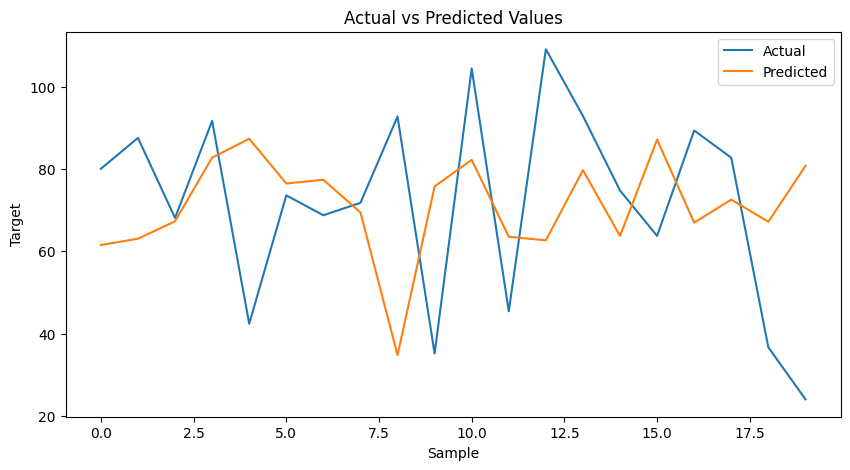

<Figure size 1000x600 with 0 Axes>

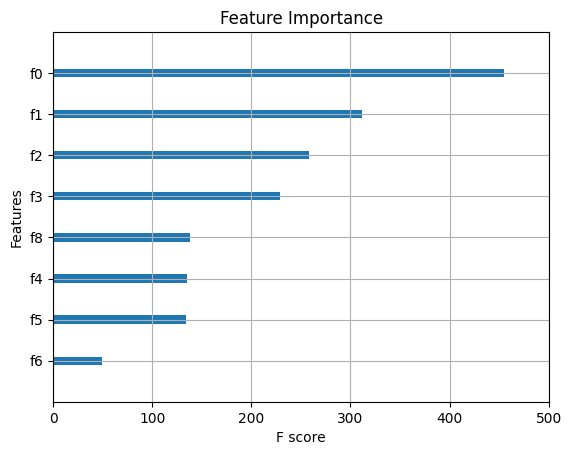

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, plot_importance

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Initial Data Shape:", df.shape)
    print("Column Names:", df.columns.tolist())
    return df

# Preprocess data
def preprocess_data(df, target=None):
    df = df.dropna()

    # Extract date features if 'Date' exists
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df['Day'] = df['Date'].dt.day
        df['Month'] = df['Date'].dt.month
        df['Hour'] = df['Date'].dt.hour
        df.drop(['Date'], axis=1, inplace=True)

    # If no target specified, default to 'AQI' or ask user
    if target is None:
        if 'AQI' in df.columns:
            target = 'AQI'
        else:
            print("\nAvailable columns:", df.columns.tolist())
            target = input("Enter the target column name (what you're predicting): ").strip()

    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in dataset.")

    # Define features and target
    features = [col for col in df.columns if col != target]
    X = df[features]
    y = df[target]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, features, target

# Train model
def train_model(X_train, y_train):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n✅ RMSE: {rmse:.2f}")
    print(f"✅ R² Score: {r2:.2f}")

    # Plot predictions
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.title("Actual vs Predicted Values")
    plt.xlabel("Sample")
    plt.ylabel("Target")
    plt.show()

# Feature importance
def plot_feature_importance(model, feature_names):
    plt.figure(figsize=(10, 6))
    plot_importance(model, importance_type='weight', show_values=False)
    plt.title("Feature Importance")
    plt.show()

# Main pipeline
def main():
    df = load_data(file_path)
    X, y, scaler, features, target = preprocess_data(df)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train & evaluate
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    plot_feature_importance(model, features)

# Run script
if __name__ == "__main__":
    main()
